## Plotting Bootstrapped UShER dNdS results.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/cwagner2/Work/projects/covid/long-deletions/')

In [3]:
## Matplot lib settings
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize']= 12
mpl.rcParams['legend.fontsize']=10
mpl.rcParams['legend.title_fontsize']=12

### Load datasets

In [4]:
og = pd.read_csv('usher/trimmed/dn_ds_dstop_bootstrap.tsv',sep='\t')
og['gene'] = np.where(og['gene'] == 'S','Spike',og['gene'])

In [5]:
degen = pd.read_csv('usher/trimmed/dn_ds_dstop_bootstrap_4degenerate.tsv',sep='\t')
degen['gene'] = np.where(degen['gene'] == 'S','Spike',degen['gene'])

In [6]:
degen

,gene,missense,nonsense,synonymous,undoStop,dS,dN,dStop,dN_dS,dStop_dS,...,dN_min,dStop_min,dN_dS_min,dStop_dS_min,dS_max,dN_max,dStop_max,dN_dS_max,dStop_dS_max,CI
0,E,23979,16,14541,0,1021.675742,765.284873,11.740706,0.749049,0.011492,...,755.327457,5.870353,0.733862,0.005766,1038.046724,775.178460,18.344854,0.765019,0.017816,95
1,M,63792,126,80598,2,2023.899684,632.017087,15.357725,0.312277,0.007588,...,626.934061,12.432444,0.308953,0.006135,2038.137645,637.020357,18.404893,0.315575,0.009109,95
2,N,243342,317,152729,15,2171.211366,1179.258233,12.101343,0.543134,0.005574,...,1174.412017,10.765232,0.539589,0.004951,2181.987173,1184.104569,13.475628,0.546663,0.006216,95
3,ORF1a,1328866,880,1006032,27,1788.490682,676.113451,4.960325,0.378036,0.002773,...,674.976790,4.622121,0.377074,0.002584,1791.966350,677.260276,5.315439,0.379010,0.002973,95
4,ORF1b,592141,418,530552,8,1527.501810,495.273079,4.403747,0.324237,0.002883,...,494.009242,3.992871,0.323021,0.002611,1531.578588,496.575433,4.835693,0.325476,0.003166,95
5,ORF3a,196513,1684,76980,20,1802.168783,1617.114506,156.776584,0.897316,0.086993,...,1610.012428,149.421863,0.889926,0.082825,1815.045347,1624.133883,164.317501,0.904885,0.091199,95
6,ORF6,27946,1670,19985,26,2853.874758,1308.167975,530.118340,0.458383,0.185754,...,1292.299194,505.350386,0.450265,0.176909,2892.720156,1323.989945,555.830667,0.466758,0.195015,95
7,ORF7a,110025,8688,34325,221,1863.930115,2115.169819,1631.956902,1.134790,0.875546,...,2101.750194,1597.018598,1.121125,0.854573,1883.641889,2128.204475,1666.148540,1.148644,0.896362,95
8,ORF7b,22295,1670,8369,43,1087.763216,1557.681371,967.846628,1.432004,0.889759,...,1537.210384,921.482718,1.396764,0.843044,1110.898818,1578.433571,1014.790087,1.468310,0.937112,95
9,ORF8,85267,9313,23949,4530,1514.004016,1677.070627,1644.636345,1.107706,1.086283,...,1665.387069,1611.431927,1.092117,1.060267,1533.222239,1688.872195,1678.366136,1.123482,1.112317,95


In [7]:
genes=['ORF1a','ORF1b','Spike','ORF3a','E','M','ORF6','ORF7a','ORF7b','ORF8','N']

### Plot dN-dS

In [8]:
def plot_dN(df,genes,path=None):
    fig, ax = plt.subplots(tight_layout=True)
    ax.scatter(genes,[df.loc[df.gene==gene,'dN'].values[0] for gene in genes],c='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
    ax.scatter(genes,[df.loc[df.gene==gene,'dStop'].values[0] for gene in genes],c='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)
    ax.scatter(genes,[df.loc[df.gene==gene,'dS'].values[0] for gene in genes],c='#ff9f1c',label='Synonymous',ec ='#6C430C',zorder=2)
    if 'dN_dS_min' in df.columns:
        ax.vlines(genes,ymin=[df.loc[df.gene==gene,'dN_min'].values[0] for gene in genes],ymax=[df.loc[df.gene==gene,'dN_max'].values[0] for gene in genes],colors=['#2ec4b6']*len(df['gene']),zorder=1)
        ax.vlines(genes,ymin=[df.loc[df.gene==gene,'dStop_min'].values[0] for gene in genes],ymax=[df.loc[df.gene==gene,'dStop_max'].values[0] for gene in genes],colors=['#e71d36']*len(df['gene']),zorder=1)
        ax.vlines(genes,ymin=[df.loc[df.gene==gene,'dS_min'].values[0] for gene in genes],ymax=[df.loc[df.gene==gene,'dS_max'].values[0] for gene in genes],colors=['#ff9f1c']*len(df['gene']),zorder=1)
    #ax.axhline(y=1, ls='dashed',c='black')
    ax.set_ylabel('Mutation count/expected number of sites')
    ax.legend(title='Mutation type',frameon=True,loc='upper left')
    #ax.set_yscale('log')
    ax.set_xticklabels(genes,rotation=90)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_87431/2959223287.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


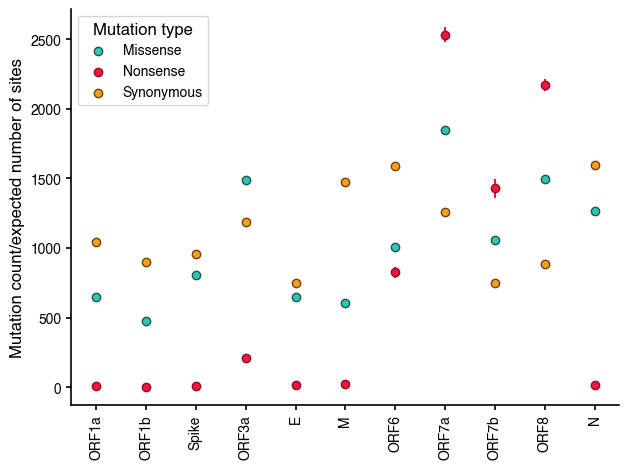

In [9]:
plot_dN(og,genes,path='figs/supplemental/counts_sites_gene.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_87431/2959223287.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


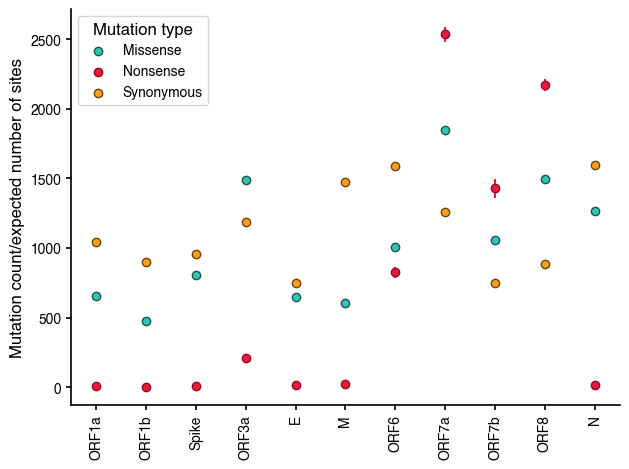

In [10]:
plot_dN(og,genes,path='figs/supplemental/counts_sites_gene.jpg')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_87431/2959223287.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


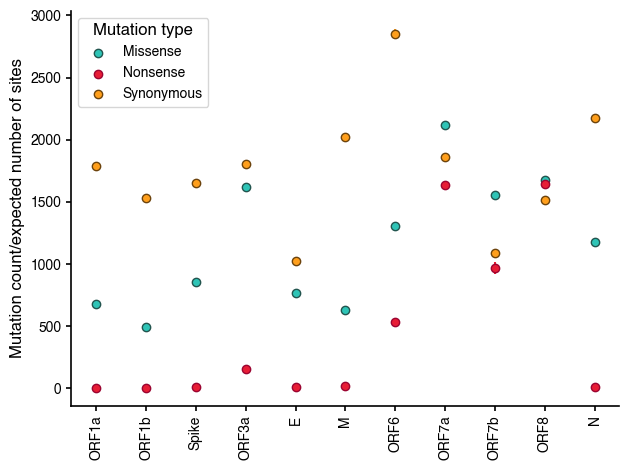

In [11]:
plot_dN(degen,genes,path='figs/supplemental/counts_sites_gene_degenerate.pdf')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_87431/2959223287.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


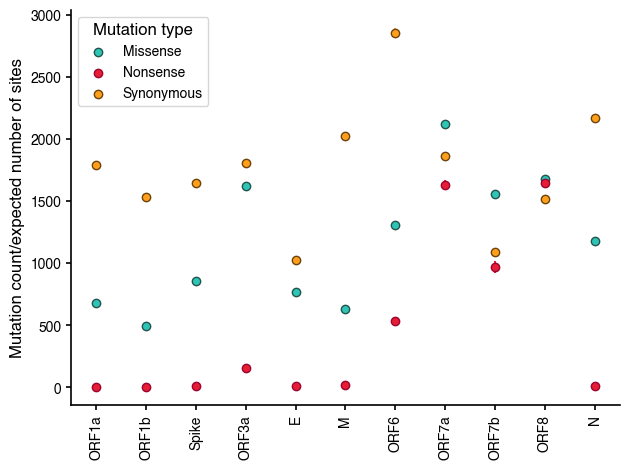

In [12]:
plot_dN(degen,genes,path='figs/supplemental/counts_sites_gene_degenerate.jpg')

In [13]:
def plot_dN_dS(df):
    fig, ax = plt.subplots(tight_layout=True)
    ax.scatter(df['gene'],df['dN_dS'],c='#2ec4b6',label='Missense')
    ax.scatter(df['gene'],df['dStop_dS'],c='#e71d36',label='Nonsense')
    if 'dN_dS_min' in df.columns:
        ax.vlines(df['gene'],ymin=df['dN_dS_min'],ymax = df['dN_dS_max'],colors=['#2ec4b6']*len(df['gene']))
        ax.vlines(df['gene'],ymin=df['dStop_dS_min'],ymax = df['dStop_dS_max'],colors=['#e71d36']*len(df['gene']))
    ax.axhline(y=1, ls='dashed',c='black')
    ax.set_ylabel('dN/dS')
    ax.legend(title='Mutation type')
    

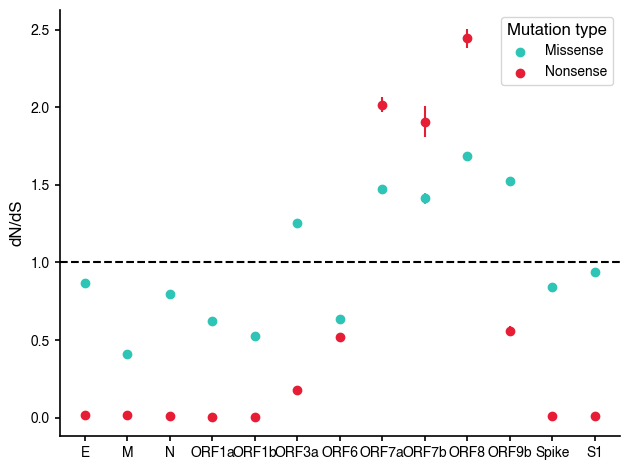

In [14]:
plot_dN_dS(og)

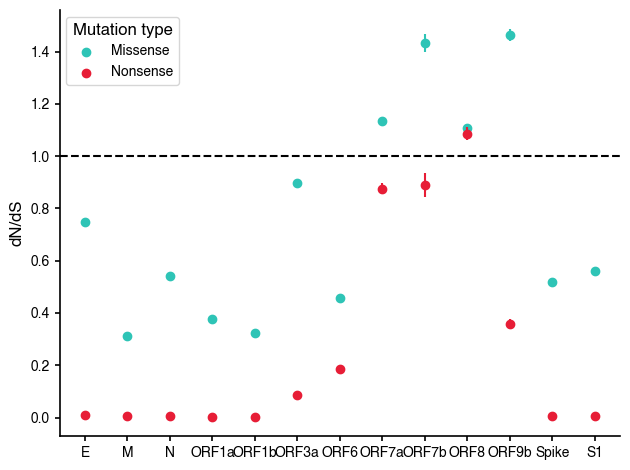

In [15]:
plot_dN_dS(degen)

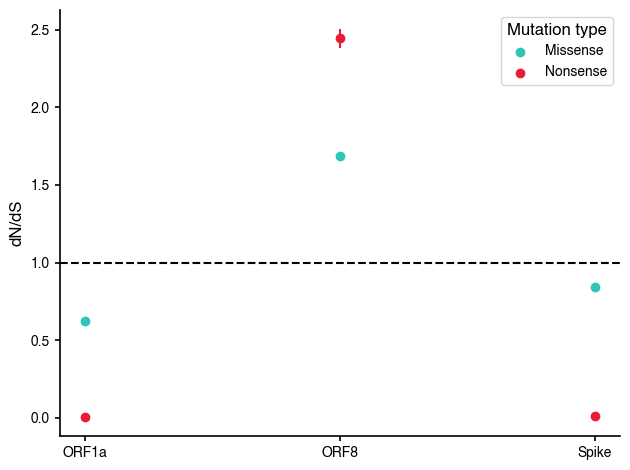

In [16]:
plot_dN_dS(og[(og.gene=='Spike')|(og.gene=='ORF8')|(og.gene=='ORF1a')])

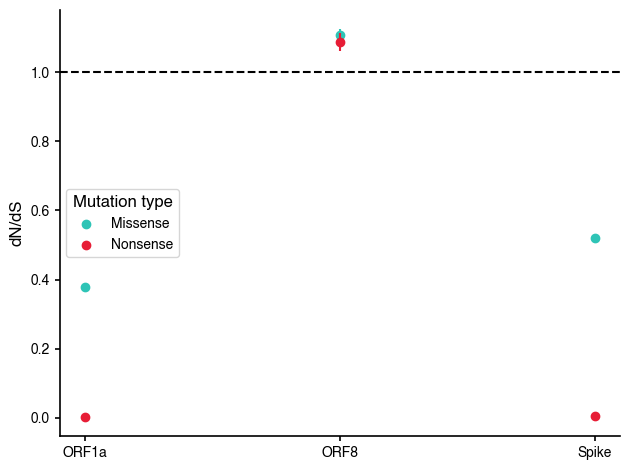

In [17]:
plot_dN_dS(degen[(degen.gene=='Spike')|(degen.gene=='ORF8')|(degen.gene=='ORF1a')])

In [9]:
def plot_dN_dS_bar(df,path=None,legend=False,locs={'ORF8':0,'Spike':1, 'ORF1a':2},labels=['ORF8','Spike','ORF1a'],width=3,title=None):
    maxv = max(max(df['dStop_dS_max']),max(df['dN_dS_max']))
    fig, ax = plt.subplots(tight_layout=True,figsize=(width,3))
    ax.axhline(y=1, ls='dashed',c='black',zorder=1)
    ax.bar(df['gene'].map(locs)-0.4,df['dN_dS'], width=0.4,color='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
    ax.bar(df['gene'].map(locs),df['dStop_dS'],width=0.4,color='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)
    if 'dN_dS_min' in df.columns:
        ax.errorbar(df['gene'].map(locs)-0.4, df['dN_dS'],yerr=[df['dN_dS']-df['dN_dS_min'],df['dN_dS_max']-df['dN_dS']],ecolor='k',capsize=2,fmt='none')
        ax.errorbar(df['gene'].map(locs), df['dStop_dS'],yerr=[df['dStop_dS']-df['dStop_dS_min'],df['dStop_dS_max']-df['dStop_dS']],ecolor='k',capsize=2,fmt='none')
    
    ax.set_ylabel('dN/dS')
    if legend == True:
        ax.legend(title='Mutation type',frameon=False)
    #ax.set_yscale('log')
    
    ax.set_ylim(-0.05,maxv+0.1)
    #ax.set_ylim(-0.05,2.6)
    ax.set_xticks([locs[x]-0.2 for x in labels],labels=labels)
    
    if title:
        ax.set_title(title)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

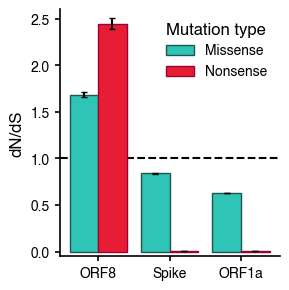

In [10]:
plot_dN_dS_bar(og[(og.gene=='Spike')|(og.gene=='ORF8')|(og.gene=='ORF1a')],path='figs/fig4/dNdS_legend.pdf',legend=True)

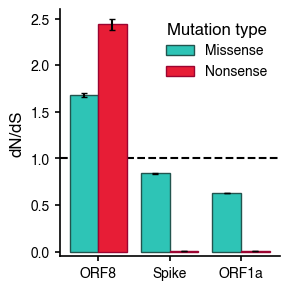

In [11]:
plot_dN_dS_bar(og[(og.gene=='Spike')|(og.gene=='ORF8')|(og.gene=='ORF1a')],path='figs/fig4/dNdS_legend.jpg',legend=True)

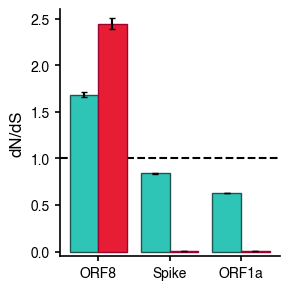

In [12]:
plot_dN_dS_bar(og[(og.gene=='Spike')|(og.gene=='ORF8')|(og.gene=='ORF1a')],path='figs/fig4/dNdS.pdf')

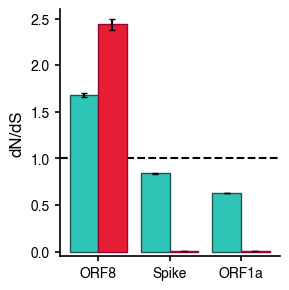

In [13]:
plot_dN_dS_bar(og[(og.gene=='Spike')|(og.gene=='ORF8')|(og.gene=='ORF1a')],path='figs/fig4/dNdS.jpg')

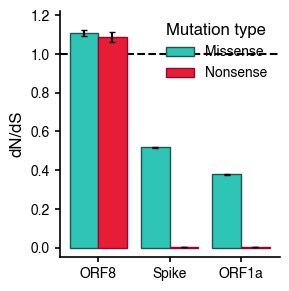

In [14]:
plot_dN_dS_bar(degen[(degen.gene=='Spike')|(degen.gene=='ORF8')|(degen.gene=='ORF1a')],path='figs/fig4/dNdS_degen_legend.pdf',legend=True)

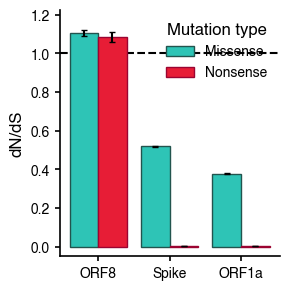

In [15]:
plot_dN_dS_bar(degen[(degen.gene=='Spike')|(degen.gene=='ORF8')|(degen.gene=='ORF1a')],path='figs/fig4/dNdS_degen_legend.jpg',legend=True)

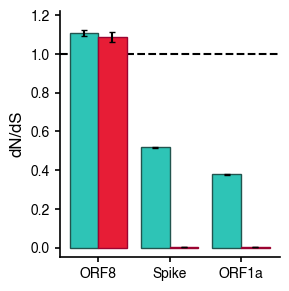

In [16]:
plot_dN_dS_bar(degen[(degen.gene=='Spike')|(degen.gene=='ORF8')|(degen.gene=='ORF1a')],path='figs/fig4/dNdS_degen.pdf')

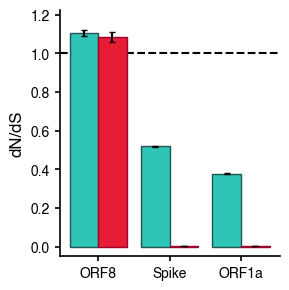

In [17]:
plot_dN_dS_bar(degen[(degen.gene=='Spike')|(degen.gene=='ORF8')|(degen.gene=='ORF1a')],path='figs/fig4/dNdS_degen.jpg')

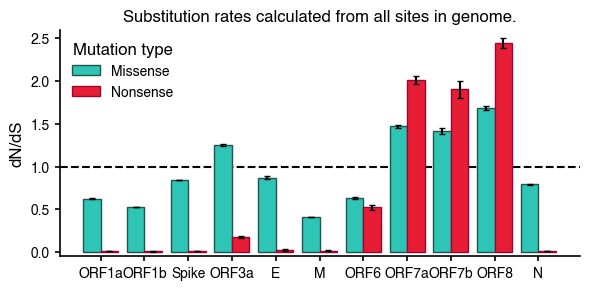

In [18]:
plot_dN_dS_bar(og,path='figs/supplemental/dNdS_allgenes_legend.pdf',legend=True,locs=dict(zip(genes,range(len(genes)))),labels=genes,width=6,title='Substitution rates calculated from all sites in genome.')

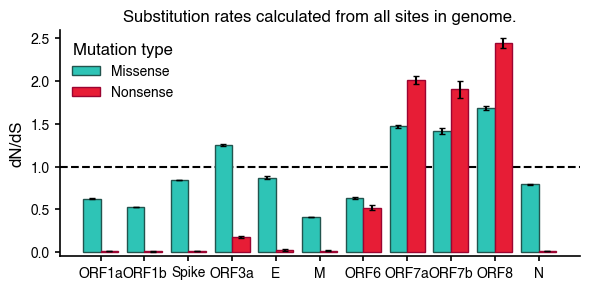

In [19]:
plot_dN_dS_bar(og,path='figs/supplemental/dNdS_allgenes_legend.jpg',legend=True,locs=dict(zip(genes,range(len(genes)))),labels=genes,width=6,title='Substitution rates calculated from all sites in genome.')

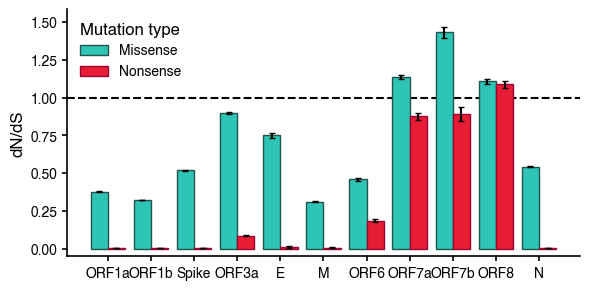

In [20]:
plot_dN_dS_bar(degen,path='figs/supplemental/dNdS_allgenes_degen_legend.pdf',legend=True,locs=dict(zip(genes,range(len(genes)))),labels=genes,width=6)

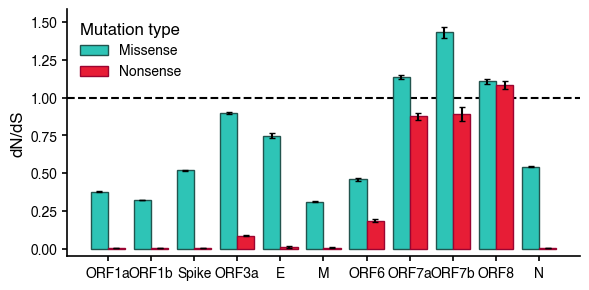

In [21]:
plot_dN_dS_bar(degen,path='figs/supplemental/dNdS_allgenes_degen_legend.jpg',legend=True,locs=dict(zip(genes,range(len(genes)))),labels=genes,width=6)

In [22]:
def plot_dN_dS_sub(df1,df2,genes,path=None):
    maxdf1 = max(max(df1['dStop_dS_max']),max(df1['dN_dS_max']))
    maxdf2 = max(max(df2['dStop_dS_max']),max(df2['dN_dS_max']))
    maxv = max(maxdf1, maxdf2)
    
    locs = dict(zip(genes,range(len(genes))))
    labels=genes
    
    fig, ax = plt.subplots(nrows=2,tight_layout=True,figsize=(6,6))
    for i,df in enumerate([df1,df2]):
        ax[i].axhline(y=1, ls='dashed',c='black',zorder=1)
        ax[i].bar(df['gene'].map(locs)-0.4,df['dN_dS'], width=0.4,color='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
        ax[i].bar(df['gene'].map(locs),df['dStop_dS'],width=0.4,color='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)
        if 'dN_dS_min' in df.columns:
            ax[i].errorbar(df['gene'].map(locs)-0.4, df['dN_dS'],yerr=[df['dN_dS']-df['dN_dS_min'],df['dN_dS_max']-df['dN_dS']],ecolor='k',capsize=2,fmt='none')
            ax[i].errorbar(df['gene'].map(locs), df['dStop_dS'],yerr=[df['dStop_dS']-df['dStop_dS_min'],df['dStop_dS_max']-df['dStop_dS']],ecolor='k',capsize=2,fmt='none')
    
        ax[i].set_ylabel('dN/dS')
        ax[i].set_ylim(-0.05,maxv+0.1)
        ax[i].set_xticks([locs[x]-0.2 for x in labels],labels=labels,rotation=90)
        
    ax[0].set_title('Substitution rates calculated from 4-fold degenerate sites')
    ax[1].set_title('Substitution rates calculated from all sites in genome')
    ax[0].text(x=-2.4,y=2.5,s='A',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})
    ax[1].text(x=-2.4,y=2.5, s='B',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})
    
    #plt.subplots_adjust(hspace=0.5)
    
    fig.legend(*ax[1].get_legend_handles_labels(),
        loc='right',frameon=False,bbox_to_anchor = (1.2,0.5),title='Mutation type')   
    
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

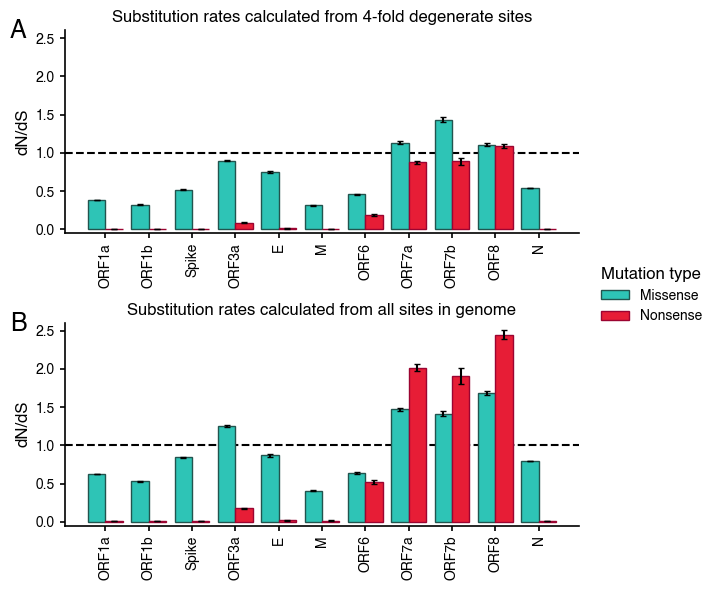

In [25]:
plot_dN_dS_sub(degen,og,genes)

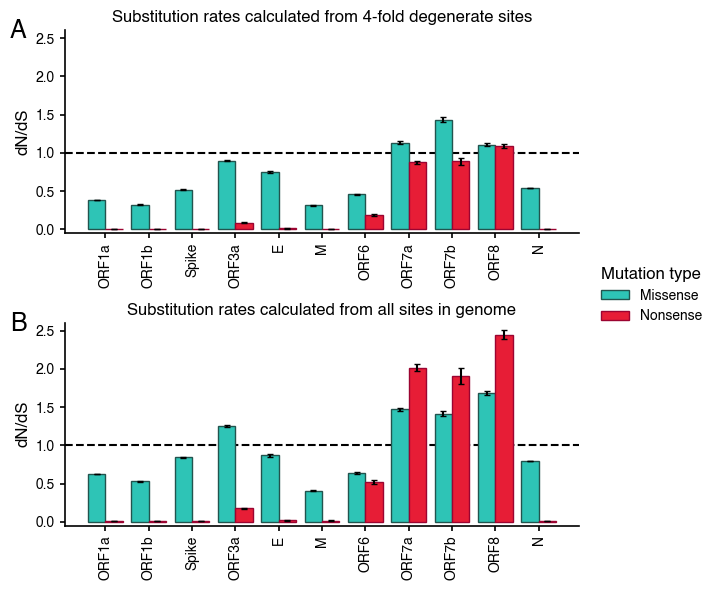

In [26]:
plot_dN_dS_sub(degen,og,genes)

In [27]:
def plot_diffs_bar(df,path=None,legend=False,locs={'ORF8':0,'Spike':1, 'ORF1a':2},labels=['ORF8','Spike','ORF1a'],width=3):
    
    fig, ax = plt.subplots(tight_layout=True,figsize=(width,3))
    ax.axhline(y=1, ls='dashed',c='black',zorder=1)
    ax.bar(df['gene'].map(locs)-0.25,df['dS'], width=0.25,color='#ff9f1c',label='Missense',ec='#6C430C',zorder=2)
    ax.bar(df['gene'].map(locs),df['dN'], width=0.25,color='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
    ax.bar(df['gene'].map(locs)+0.25,df['dStop'],width=0.25,color='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)
    if 'dN_dS_min' in df.columns:
        ax.errorbar(df['gene'].map(locs)-0.25, df['dS'],yerr=[df['dS']-df['dS_min'],df['dS_max']-df['dS']],ecolor='k',capsize=2,fmt='none')
        ax.errorbar(df['gene'].map(locs), df['dN'],yerr=[df['dN']-df['dN_min'],df['dN_max']-df['dN']],ecolor='k',capsize=2,fmt='none')
        ax.errorbar(df['gene'].map(locs)+0.25, df['dStop'],yerr=[df['dStop']-df['dStop_min'],df['dStop_max']-df['dStop']],ecolor='k',capsize=2,fmt='none')
    
    ax.set_ylabel('Observed mutation count\n/expected sites')
    if legend == True:
        ax.legend(title='Mutation type',frameon=False)
    #ax.set_yscale('log')
    #ax.set_ylim(-40,2300)
    ax.set_xticks([locs[x] for x in labels],labels=labels)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

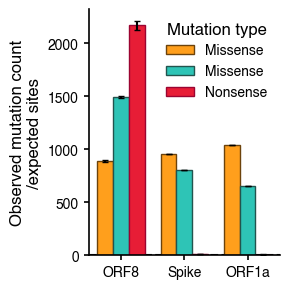

In [28]:
plot_diffs_bar(og[(og.gene=='Spike')|(og.gene=='ORF8')|(og.gene=='ORF1a')],legend=True)

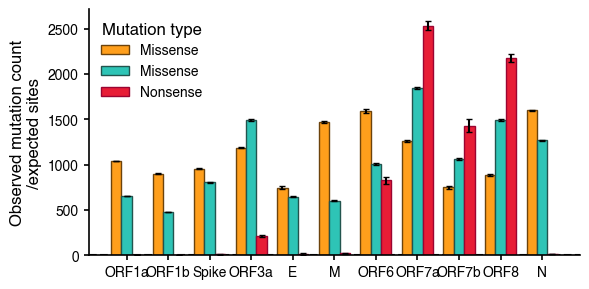

In [29]:
plot_diffs_bar(og,legend=True,locs=dict(zip(genes,range(len(genes)))),labels=genes,width=6)

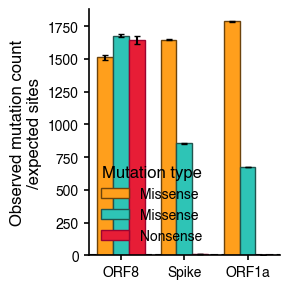

In [30]:
plot_diffs_bar(degen[(degen.gene=='Spike')|(degen.gene=='ORF8')|(degen.gene=='ORF1a')],legend=True)

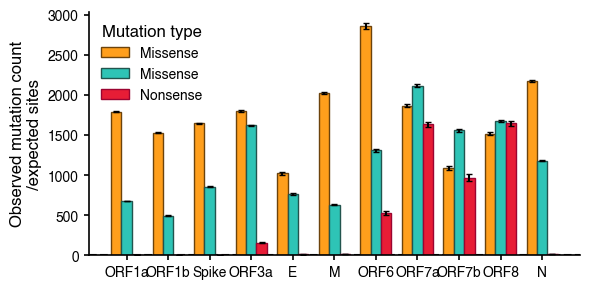

In [31]:
plot_diffs_bar(degen,legend=True,locs=dict(zip(genes,range(len(genes)))),labels=genes,width=6)

In [32]:
def plot_dN_dS_bar_flip(df,path=None,legend=False,locs={'ORF8':2,'Spike':1, 'ORF1a':0},labels=['ORF1a','Spike','ORF8'],width=3):
    maxv = max(max(df['dStop_dS_max']),max(df['dN_dS_max']))

    fig, ax = plt.subplots(tight_layout=True,figsize=(width,4))
    ax.axvline(x=1, ls='dashed',c='black',zorder=1)
    ax.barh([locs[label] for label in labels], [df.loc[df.gene==gene,'dN_dS'].values[0] for gene in labels], height=0.4,color='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
    ax.barh([locs[label]-0.4 for label in labels], [df.loc[df.gene==gene,'dStop_dS'].values[0] for gene in labels],height=0.4,color='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)
    if 'dN_dS_min' in df.columns:
        ax.errorbar(y=df['gene'].map(locs), x=df['dN_dS'],xerr=[df['dN_dS']-df['dN_dS_min'],df['dN_dS_max']-df['dN_dS']],ecolor='k',capsize=2,fmt='none')
        ax.errorbar(y=df['gene'].map(locs)-0.4, x=df['dStop_dS'],xerr=[df['dStop_dS']-df['dStop_dS_min'],df['dStop_dS_max']-df['dStop_dS']],ecolor='k',capsize=2,fmt='none')
    
    ax.set_xlabel('dN/dS')
    if legend == True:
        ax.legend(title='Mutation type',frameon=False)
    #ax.set_yscale('log')
    ax.set_xlim(-0.05,maxv+0.01)
    ax.set_yticks([locs[x]-0.2 for x in labels],labels=labels)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

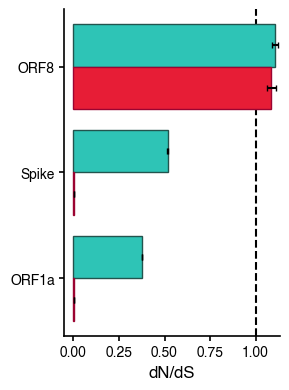

In [33]:
plot_dN_dS_bar_flip(degen[(degen.gene=='Spike')|(degen.gene=='ORF8')|(degen.gene=='ORF1a')],path='figs/fig4/dNdS_degen_vertical.pdf')

### Plot rates

In [34]:
bigrates = pd.read_csv('usher/trimmed/clusterGrowthRate.tsv',sep='\t')
bigrates['Gene'] = pd.Categorical(bigrates.Gene, categories=['ORF1a', 'ORF1b', 'Spike', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a','ORF7b', 'ORF8', 'N', 'ORF9b'], ordered=True)
bigrates=bigrates.sort_values('Gene').reset_index(drop=True)
bigrates['97.5 %'] = np.where(pd.isna(bigrates['97.5 %']),71,bigrates['97.5 %'])

In [35]:
rates = pd.read_csv('usher/trimmed/clusterGrowthRate_small.tsv',sep='\t')
rates['Gene'] = pd.Categorical(rates.Gene, categories=['ORF8','Spike','ORF1a'], ordered=True)
rates=rates.sort_values('Gene').reset_index(drop=True)
rates['97.5 %'] = np.where(pd.isna(rates['97.5 %']),71,rates['97.5 %'])
rates['obermeyer'] = np.where(rates['Variable'].str.contains('increased'),'yes','no')

In [36]:
rates

,Variable,Fold_change,2.5 %,97.5 %,Gene,Regression,obermeyer
0,mut_type_obermeyernonsense_no_increase,0.636626,0.564397,0.720684,ORF8,withObermeyer,no
1,mut_typenonsense,6.285567,5.777300,6.845936,ORF8,NaN,no
2,mut_typemissense,1.860692,1.768232,1.957098,ORF8,NaN,no
3,(Intercept),6.236387,5.979365,6.508240,ORF8,withObermeyer,no
4,mut_type_obermeyermissense_no_increase,0.773434,0.735634,0.812888,ORF8,withObermeyer,no
5,(Intercept),6.236474,5.966507,6.522862,ORF8,NaN,no
6,mut_type_obermeyermissense_increased,5.551991,5.207032,5.920900,ORF8,withObermeyer,yes
7,mut_type_obermeyernonsense_increased,9.564946,8.696701,10.539718,ORF8,withObermeyer,yes
8,(Intercept),8.446709,5.612293,13.559880,Spike,withObermeyer,no
9,mut_type_obermeyermissense_no_increase,1.273365,0.693317,2.318194,Spike,withObermeyer,no


In [37]:
variableMapper = {'mut_type_obermeyermissense_increased':'Missense: Increased fitness (Obermeyer et al)',
                  'mut_type_obermeyer_missense_no_increase':'Missense: Other',
                  'mut_typemissense':'Missense','mut_typenonsense':'Nonsense'}

In [38]:
variableMapperNoObermeyer = {'mut_typemissense':'Missense','mut_typenonsense':'Nonsense'}

In [39]:
def plot_rates_all(df):
    variableMapper = {'mut_typemissense':'Missense',
                      'mut_typenonsense':'Nonsense',
                      'mut_type_obermeyermissense_increased':'Missense: Increased fitness\n(Obermeyer et al)',
                      'mut_type_obermeyermissense_no_increase':'Missense: Other',
                      'mut_type_obermeyernonsense_increased':'Nonsense: Increased fitness\n(Obermeyer et al)',
                      'mut_type_obermeyernonsense_no_increase':'Nonsense: Other',
                     }
    #colors = ['#2ec4b6','#1C554A','#D7F4F0','#e71d36','#1C554A','#FFE9E6']
    #colors = ['#2ec4b6','#2ec4b6','#2ec4b6','#e71d36','#e71d36','#e71d36']
    colors = ['#2ec4b6','#e71d36','#1C554A','#1C554A','#922025','#922025']
    colorMapper = dict(zip(list(variableMapper.keys()),colors))
    ecolors = ['#22544E','#9B0431','#22544E','#22544E','#9B0431','#9B0431']
    #ecolors = ['#22544E','#22544E','#22544E','#9B0431','#9B0431','#9B0431']
    ecolorMapper = dict(zip(list(variableMapper.keys()),ecolors))
    locMapper = {'ORF8':0,'Spike':3,'ORF1a':6}

    fig,ax=plt.subplots(tight_layout=True,figsize=(6,4))
    for k,offset in zip(variableMapper.keys(),[-0.8,-0.4,0,0.4,0.8,1.2]):
        filt = df[df.Variable==k]
        if filt.Regression.values[0] == 'withObermeyer':
            if filt.obermeyer.values[0]=='yes':
                point = '^'
            else:
                point = 's'
        else:
            point = 'o'
        ax.scatter((filt['Gene'].cat.codes*4)+offset,filt['Fold_change'],c=colorMapper[k],label=variableMapper[k],s=50,ec=ecolorMapper[k],zorder=2,marker=point)
        ax.vlines((filt['Gene'].cat.codes*4)+offset,ymin=filt['2.5 %'],ymax=filt['97.5 %'],colors=[ecolorMapper[k]]*len(filt['Gene']),zorder=1)
    ax.axhline(y=1, ls='dashed',c='black',zorder=0)
    ax.set_ylabel('Fold change in cluster growth\nrate relative to synonymous')
    ax.legend(frameon=False,bbox_to_anchor=(0.5,-0.5),loc='center')
    ax.set_yscale('log')
    ax.set_xticks([0,4,8],labels=['ORF8','Spike','ORF1a'])

In [40]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Create the figure


def plot_rates_split(df,path=None):
    variableMapper = {#'mut_typemissense':'Missense',
                      #'mut_typenonsense':'Nonsense',
                      'mut_type_obermeyermissense_increased':'Missense: Increased fitness\n(Obermeyer et al)',
                      'mut_type_obermeyermissense_no_increase':'Missense: Other',
                      'mut_type_obermeyernonsense_increased':'Nonsense: Increased fitness\n(Obermeyer et al)',
                      'mut_type_obermeyernonsense_no_increase':'Nonsense: Other',
                     }
    #colors = ['#2ec4b6','#e71d36','#1C554A','#D7F4F0','#922025','#FFE9E6']
    #colors = ['#1C554A','#D7F4F0','#922025','#FFE9E6']
    colors = ['#2ec4b6','#2ec4b6','#e71d36','#e71d36']
    colorMapper = dict(zip(list(variableMapper.keys()),colors))
    #ecolors = ['#22544E','#22544E','#9B0431','#9B0431']
    ecolors = ['#22544E','#22544E','#9B0431','#9B0431']
    #ecolors = ['#22544E','#9B0431','#22544E','#22544E','#9B0431','#9B0431']
    ecolorMapper = dict(zip(list(variableMapper.keys()),ecolors))
    #locMapper = {'ORF8':0,'Spike':2,'ORF1a':4}
    
    fig,ax=plt.subplots(tight_layout=True,figsize=(5,4))
    for k,offset in zip(variableMapper.keys(),[-0.45,-0.15,0.15,0.45]):
        filt = df[df.Variable==k]
        if filt.Regression.values[0] == 'withObermeyer':
            if filt.obermeyer.values[0]=='yes':
                point = '^'
            else:
                point = 's'
        else:
            point = 'o'
        ax.scatter((filt['Gene'].cat.codes*2)+offset,filt['Fold_change'],c=colorMapper[k],label=variableMapper[k],s=80,ec=ecolorMapper[k],zorder=2,marker=point)
        ax.vlines((filt['Gene'].cat.codes*2)+offset,ymin=filt['2.5 %'],ymax=filt['97.5 %'],colors=[ecolorMapper[k]]*len(filt['Gene']),zorder=1)
    ax.axhline(y=1, ls='dashed',c='black',zorder=0)
    ax.set_ylabel('Fold change in cluster growth\nrate relative to synonymous')
    #ax.legend(frameon=False,bbox_to_anchor=(0.5,-0.4),loc='center')
    ax.set_yscale('log')
    ax.set_xticks([0,2,4],labels=['ORF8','Spike','ORF1a'])
    
    
    legend_elements = [Patch(edgecolor ='#22544E', facecolor='#2ec4b6', label='Missense'),
                   Patch(edgecolor='#9B0431', facecolor='#e71d36', label='Nonsense'),
                    Line2D([0], [0], color ='k', markerfacecolor='k', marker='^', label='Increased fitness (Obermeyer et al)'),
                   Line2D([0], [0], color='k', markerfacecolor='k', marker='s', label='No fitness increase')]
    
    ax.legend(handles=legend_elements, frameon=False,bbox_to_anchor=(0.5,-0.2),ncol=2,loc='center')
    
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

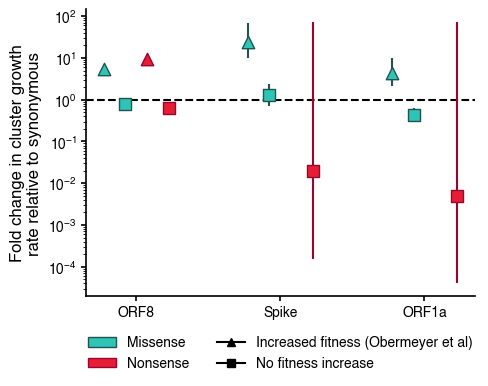

In [41]:
plot_rates_split(rates,'figs/supplemental/growthrate_obermeyer_degen.pdf') ## FIX THE LEGEND

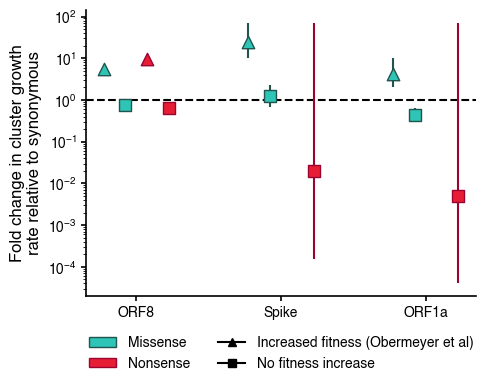

In [42]:
plot_rates_split(rates,'figs/supplemental/growthrate_obermeyer_degen.jpg') ## FIX THE LEGEND

In [43]:
def plot_rates(df):
    variableMapper = {'mut_typemissense':'Missense',
                      'mut_typenonsense':'Nonsense'
                     }
    colors = ['#2ec4b6','#e71d36']
    colorMapper = dict(zip(list(variableMapper.keys()),colors))
    ecolors = ['#22544E','#9B0431']
    ecolorMapper = dict(zip(list(variableMapper.keys()),ecolors))
    locMapper = {'ORF8':0,'Spike':3,'ORF1a':6}
    
    fig,ax=plt.subplots(tight_layout=True,figsize=(5,4))
    for k,offset in zip(variableMapper.keys(),[-0.25,0.25]):
        filt = df[df.Variable==k]
        ax.scatter((filt['Gene'].cat.codes*2)+offset,filt['Fold_change'],c=colorMapper[k],label=variableMapper[k],s=100,ec=ecolorMapper[k],zorder=2)
        ax.vlines((filt['Gene'].cat.codes*2)+offset,ymin=filt['2.5 %'],ymax=filt['97.5 %'],colors=[ecolorMapper[k]]*len(filt['Gene']),zorder=1)
    ax.axhline(y=1, ls='dashed',c='black',zorder=0)
    ax.set_ylabel('Fold change in cluster growth\nrate relative to synonymous')
    ax.legend(frameon=False,bbox_to_anchor=(1.2,0.5),loc='center')
    ax.set_yscale('log')
    ax.set_xticks([0,2,4],labels=['ORF8','Spike','ORF1a'])

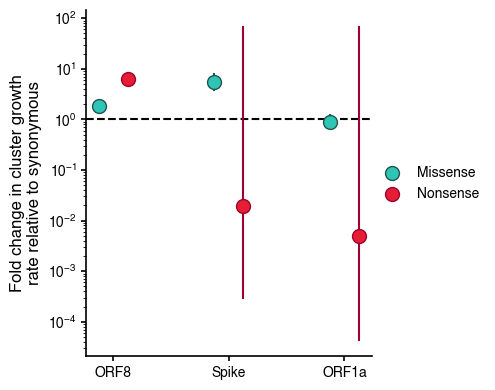

In [44]:
plot_rates(rates)

In [45]:
def plot_fig4(df1,df2,path=None,locs={'ORF8':0,'Spike':1, 'ORF1a':2},labels=['ORF8','Spike','ORF1a'],width=3,obermeyer=True):
    if obermeyer == True:
        variableMapper = {'mut_typemissense':'Missense','mut_typenonsense':'Nonsense','mut_type_obermeyermissense_increased':'Missense: Increased fitness\n(Obermeyer et al)','mut_type_obermeyermissense_other':'Missense: Other'}
        ratemax = 125
        hspace = 0.5
    else:
        variableMapper = {'mut_typemissense':'Missense','mut_typenonsense':'Nonsense'}
        ratemax = 25
        hspace=0.3
    colors = ['#2ec4b6','#e71d36','#4D4D4D','#D3D3D3']
    colorMapper = dict(zip(list(variableMapper.keys()),colors))
    ecolors = ['#22544E','#9B0431','#383838','#717171']
    ecolorMapper = dict(zip(list(variableMapper.keys()),ecolors))
    locMapper = {'ORF8':0,'Spike':1,'ORF1a':2}
    fig,ax=plt.subplots(figsize=(3,7),nrows=2)
   
    
    for k,offset in zip(variableMapper.keys(),[-0.3,-0.1,0.1,0.2]):
        filt = df1[df1.Variable==k]
        ax[1].scatter(filt['Gene'].cat.codes+offset,filt['Fold_change'],c=colorMapper[k],label=variableMapper[k],s=50,ec=ecolorMapper[k],zorder=2)
        ax[1].vlines(filt['Gene'].cat.codes+offset,ymin=filt['2.5 %'],ymax=filt['97.5 %'],colors=[ecolorMapper[k]]*len(filt['Gene']),zorder=1)
    ax[1].axhline(y=1, ls='dashed',c='black',zorder=0)
    ax[1].set_ylabel('Fold change in cluster growth\nrate relative to synonymous')
    
    ax[1].set_yscale('log')
    ax[1].set_xticks([locs[x]-0.2 for x in labels],labels=labels)
    ax[1].set_xlim(-0.7,2.5)
    ax[1].set_ylim(0.001,ratemax)
    
    fig.legend(*ax[1].get_legend_handles_labels(),
            loc='center', ncol=2,frameon=False)
    
    filt = df2[(df2.gene=='Spike')|(df2.gene=='ORF8')|(df2.gene=='ORF1a')]
    maxv = max(max(filt['dStop_dS_max']),max(filt['dN_dS_max']))
    
    ax[0].axhline(y=1, ls='dashed',c='black',zorder=1)
    ax[0].bar(df2['gene'].map(locs)-0.4,df2['dN_dS'], width=0.4,color='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
    ax[0].bar(df2['gene'].map(locs),df2['dStop_dS'],width=0.4,color='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)

    ax[0].errorbar(df2['gene'].map(locs)-0.4, df2['dN_dS'],yerr=[df2['dN_dS']-df2['dN_dS_min'],df2['dN_dS_max']-df2['dN_dS']],ecolor='k',capsize=2,fmt='none')
    ax[0].errorbar(df2['gene'].map(locs), df2['dStop_dS'],yerr=[df2['dStop_dS']-df2['dStop_dS_min'],df2['dStop_dS_max']-df2['dStop_dS']],ecolor='k',capsize=2,fmt='none')

    ax[0].set_ylabel('dN/dS')
    #if legend == True:
     
        #ax[1].legend(title='Mutation type',frameon=False)
    ax[0].set_ylim(-0.05,maxv +0.1)
    ax[0].set_xticks([locs[x]-0.2 for x in labels],labels=labels)
    ax[0].set_xlim(-0.7,2.5)
    
    plt.subplots_adjust(hspace=hspace)
    
    ax[0].text(x=-1.8,y=maxv+0.1,s='A',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})
    ax[1].text(x=-1.8,y=ratemax*1.2, s='B',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})



    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

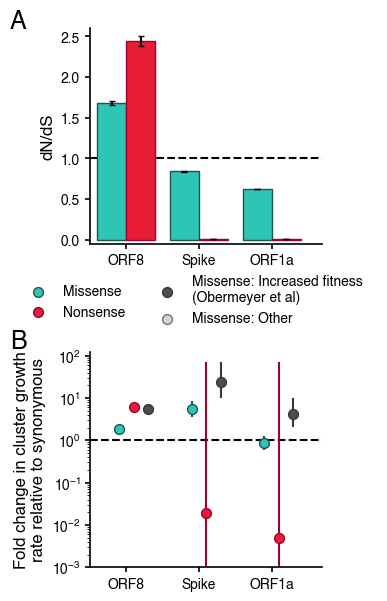

In [46]:
plot_fig4(rates,og,'figs/fig4/fig4_subset.pdf')

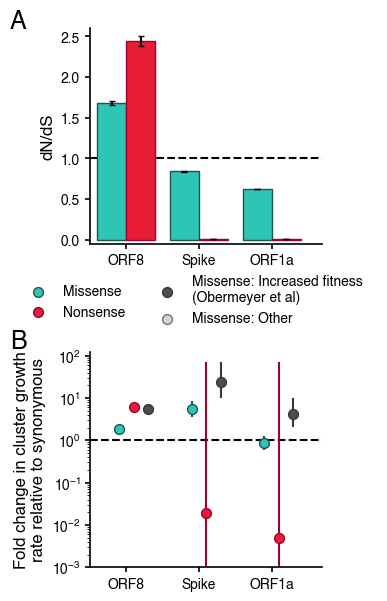

In [47]:
plot_fig4(rates,og,'figs/fig4/fig4_subset.jpg')

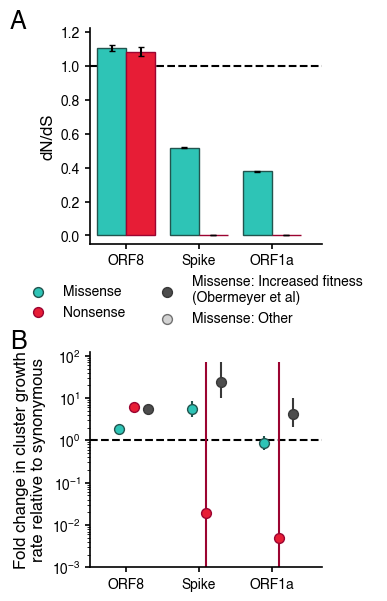

In [48]:
plot_fig4(rates,degen,'figs/fig4/fig4_subset_degen.pdf')

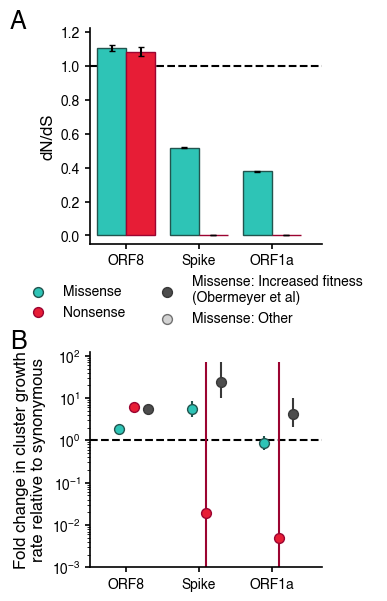

In [49]:
plot_fig4(rates,degen,'figs/fig4/fig4_subset_degen.jpg')

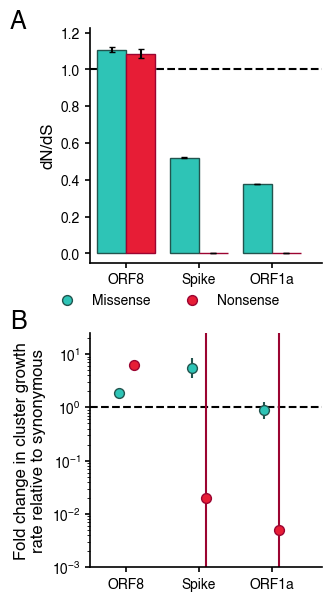

In [50]:
plot_fig4(rates,degen,'figs/fig4/fig4_degen_subset_noObermeyer.pdf',obermeyer=False)

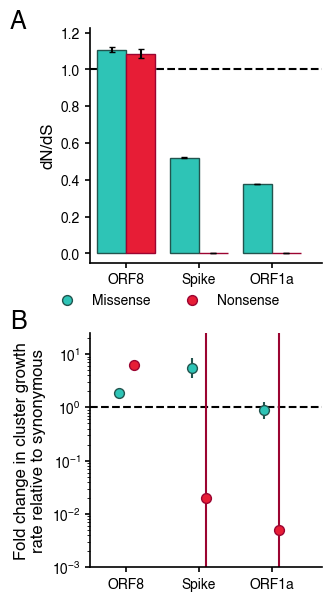

In [51]:
plot_fig4(rates,degen,'figs/fig4/fig4_degen_subsetnoObermeyer.jpg',obermeyer=False)

In [52]:
def plot_bigfig4(df1,df2,genes,path=None):
    maxv = max(max(df1['dStop_dS_max']),max(df1['dN_dS_max']))
    
    locs = dict(zip(genes,range(len(genes))))
    labels=genes
    
    fig, ax = plt.subplots(nrows=2,tight_layout=True,figsize=(7,6),sharex=True)
    
    ax[0].axhline(y=1, ls='dashed',c='black',zorder=1)
    ax[0].bar(df1['gene'].map(locs)-0.4,df1['dN_dS'], width=0.4,color='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
    ax[0].bar(df1['gene'].map(locs),df1['dStop_dS'],width=0.4,color='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)
    if 'dN_dS_min' in df1.columns:
        ax[0].errorbar(df1['gene'].map(locs)-0.4, df1['dN_dS'],yerr=[df1['dN_dS']-df1['dN_dS_min'],df1['dN_dS_max']-df1['dN_dS']],ecolor='k',capsize=2,fmt='none')
        ax[0].errorbar(df1['gene'].map(locs), df1['dStop_dS'],yerr=[df1['dStop_dS']-df1['dStop_dS_min'],df1['dStop_dS_max']-df1['dStop_dS']],ecolor='k',capsize=2,fmt='none')

    ax[0].set_ylabel('dN/dS')
    ax[0].set_ylim(-0.05,maxv+0.1)
    ax[0].set_xticks([locs[x]-0.2 for x in labels],labels=labels,rotation=90)
        
    ax[0].text(x=-2.4,y=1.5,s='A',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})
    ax[1].text(x=-2.4,y=45, s='B',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})
    
    
    variableMapper = {'mut_typemissense':'Missense','mut_typenonsense':'Nonsense'}
    ratemax = 25
    hspace=0.3
    colors = ['#2ec4b6','#e71d36','#4D4D4D','#D3D3D3']
    colorMapper = dict(zip(list(variableMapper.keys()),colors))
    ecolors = ['#22544E','#9B0431','#383838','#717171']
    ecolorMapper = dict(zip(list(variableMapper.keys()),ecolors))
   
    plt.subplots_adjust(hspace=-1)
    for k,offset in zip(variableMapper.keys(),[-0.3,-0.1,0.1,0.2]):
        filt = df2[df2.Variable==k]
        ax[1].scatter(filt['Gene'].cat.codes+offset,filt['Fold_change'],c=colorMapper[k],label=variableMapper[k],s=50,ec=ecolorMapper[k],zorder=2)
        ax[1].vlines(filt['Gene'].cat.codes+offset,ymin=filt['2.5 %'],ymax=filt['97.5 %'],colors=[ecolorMapper[k]]*len(filt['Gene']),zorder=1)
    ax[1].axhline(y=1, ls='dashed',c='black',zorder=0)
    ax[1].set_ylabel('Fold change in cluster growth\nrate relative to synonymous')
    
    ax[1].set_yscale('log')
    ax[1].set_xticks([locs[x]-0.2 for x in labels],labels=labels,rotation=90)
    ax[1].set_ylim(0.001,ratemax)
    ax[0].xaxis.set_tick_params(labelbottom=True)
    
    fig.legend(*ax[1].get_legend_handles_labels(),
            loc='center', ncol=2,frameon=True)

    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

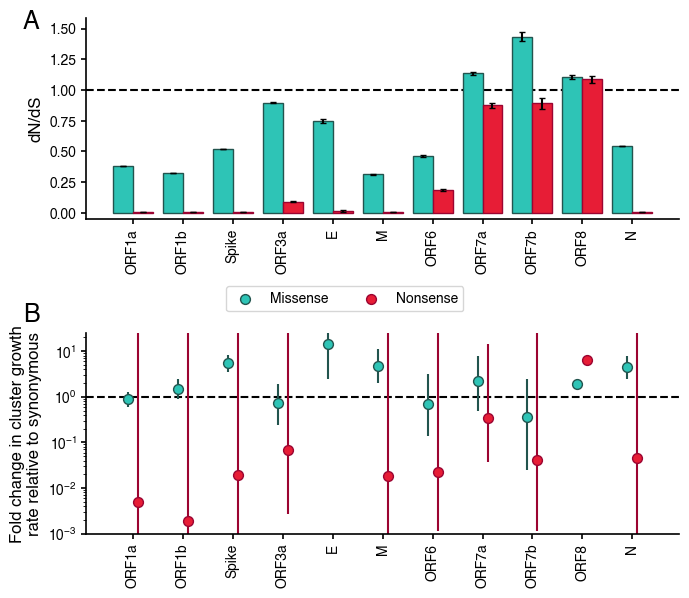

In [53]:
plot_bigfig4(degen,bigrates[bigrates.Gene!='ORF9b'],genes,'figs/fig4/fig4_allgenes.pdf')

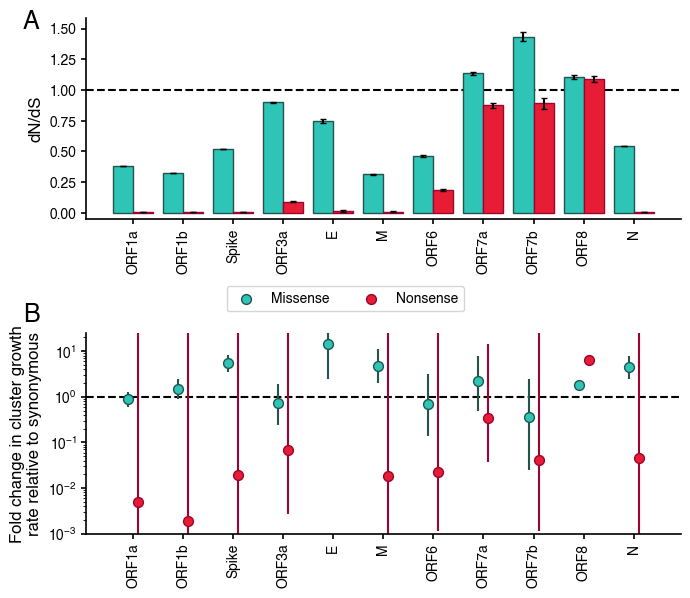

In [54]:
plot_bigfig4(degen,bigrates[bigrates.Gene!='ORF9b'],genes,'figs/fig4/fig4_allgenes.jpg')